<a href="https://colab.research.google.com/github/H1bertoT/DNC/blob/main/Estat%C3%ADstica_descritiva_DNC_estat%C3%ADstica_descritiva_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
[1,2,3]*3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

 Bibliotecas

In [ ]:
%pip install sidetable   #variáveis categóricas

import numpy as np
import pandas as pd

import sidetable
from scipy import stats     #para estatística descritiva

import seaborn as sns
import matplotlib.pyplot as plt      #gráficos 2D convencionais

import plotly.express as px
import plotly.graph_objects as go    #gráficos 2D e 3D interativos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Configurações de plots

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

# Introdução

## O que é estatística

A estatística é uma ciência que se dedica à coleta, análise e interpretação de dados.  
Pode ser considerada como a arte de obter insights dos dados e é essencial à **tomada de decisão**.

Divide-se em:

![diagrama estatística](https://github.com/cmcouto-silva/figures/blob/main/statistics/areas_da_estatistica.png?raw=true)


## População vs amostra

![populacao_amostra](https://github.com/cmcouto-silva/figures/blob/main/statistics/populacao_amostra.png?raw=true)

<br/>

Siglas comuns:

| Metric             | Population parameter   | Sample Statistic   |
|:-------------------|:-----------------------|:-------------------|
| size               | $N$                    | $n$                |
| mean               | $\mu$                  | $\bar{x}$          |
| variance           | $\sigma^2$             | $s^2$              |
| standard deviation | $\sigma$               | $s$                |
| correlation        | $\rho$                 | $r$                |

Dataset de exemplo

In [ ]:
df_tips = sns.load_dataset('tips') #pegou um banco de dados da biblioteca
print(df_tips.shape)
df_tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Exemplos: 

In [ ]:
print(df_tips.shape)
df_tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_tips_sample = df_tips.sample(50) #fazendo a amostragem
#como está um valor inteiro, retorna esse tamanho de amostra
#se me dá um valor float, retorna a porcentagem
print(df_tips_sample.shape)
df_tips_sample.head()

(50, 7)


,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
228,13.28,2.72,Male,No,Sat,Dinner,2
209,12.76,2.23,Female,Yes,Sat,Dinner,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4
114,25.71,4.00,Female,No,Sun,Dinner,3


## Tipos de variáveis

![tipos_variaveis](https://github.com/cmcouto-silva/figures/blob/main/statistics/tipos_variaveis.png?raw=true)

<br/>

As variáveis categóricas ainda podem ser separadas em:
- Dicotômica ou binária (dummy)
- Policotômica

**Por que saber os tipos de dados?**

Para cada tipo de variável, aplicamos análises diferentes (estatísticas e em modelos de machine learning).

In [ ]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_tips.info() #ver como interpretou cada variável

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df_tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

# Análise Univariada

![figure book favero](https://github.com/cmcouto-silva/figures/blob/main/statistics/estatisticas_descritivas_univariadas.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).



## Variáveis Numéricas

## Estimativas / Métricas / Medidas

### Posição ou Localização

#### Medidas de tendência central

##### Média

###### Média aritmética

**Considerações:**
- Métrica mais utilizada nos negócios e em modelos de inteligência artifical
- Leva todos os dados em consideração
- Sensível a outliers

<br/>

**Fórmula**:

$$
\text{Mean} = \bar{x} = \frac{\sum_{i=1}^n{x_i}}{n}
$$

In [ ]:
df_tips['tip'].mean()

2.99827868852459

In [ ]:
df_tips['tip'].agg('mean')

2.99827868852459

In [ ]:
np.mean(df_tips['tip'])

2.99827868852459

In [ ]:
np.sum(df_tips['tip']) / len(df_tips['tip'])#diviu a soma pelo numero de entradas

2.99827868852459

###### Média ponderada

$$
\text{Weighted Mean} = \bar{x}_w = \frac{\sum_{i=1}^n{x_iw_i}}{\sum_{i=1}^n{w_i}}
$$

In [ ]:
np.average(df_tips['tip'], weights=df_tips['size'])#com pesos

3.2478309409888357

###### Trimmed mean

$$
\text{Trimmed Mean} = \bar{x} = \frac{\sum_{i=p+1}^{n-p}{x_i}}{n - 2p}
$$

In [ ]:
values = df_tips['tip'].sort_values().reset_index(drop=True)
#ignora os dados do extremo (maximos e mínimos)
values

0       1.00
1       1.00
2       1.00
3       1.00
4       1.01
       ...  
239     6.70
240     6.73
241     7.58
242     9.00
243    10.00
Name: tip, Length: 244, dtype: float64

In [ ]:
p = 10 #ignora os 10 primeiros e os 10 últimos
n = len(values[p:-p])
values[p:-p].sum() / (n - 2*p)

3.1851470588235293

In [ ]:
values = df_tips['tip'].sort_values().reset_index(drop=True)

p = 10
values[p:-p].sum() / (values.shape[0] - 2*p)
# values[p:-p].sum() / values[10:-10].shape[0]

2.9007589285714284

In [ ]:
stats.trim_mean(values, .1) #ignora os 10% maiores e os 10% menores

2.842704081632653

###### Média harmônica

In [ ]:
# F1-score 
stats.hmean(values)

2.482252914784503

##### Mediana

A mediana separa os dados em duas metades: 50% dos dados estão abaixo do valor da mediana, e os outros 50% estão acima deste valor.  
A mediana é uma métrica útil principalmente quando queremos ignorar a presença de outliers.

<br/>

**Fórmula:**

Se n é ímpar:
$$\text{Med} = X_{(n+1)/2}$$

Se n é par:
$$\text{Med} = \frac{X_{n/2}+X_{n/2+1}}{2}$$

Exemplo com dados sintéticos:

In [ ]:
values = [4,50,3,1,2]

In [ ]:
# Manualmente

In [ ]:
sorted_values = sorted(values)
sorted_values

[1, 2, 3, 4, 50]

In [ ]:
n = len(sorted_values)
pos = int((n+1)/2 - 1)
values[pos]

3

In [ ]:
values = np.array([8,6,7,6,85,10])
sorted_values = np.sort(values)
sorted_values

array([ 6,  6,  7,  8, 10, 85])

In [ ]:
n = len(sorted_values)
pos = np.array([n/2, n/2+ 1]) - 1
sorted_values[pos.astype(int)].mean()

7.5

In [ ]:
np.median(sorted_values)

7.5

Exemplo com dataset real:

In [ ]:
df_tips['tip'].agg('median')

2.9

##### Moda

A moda é o valor mais frequente, ou seja, que aparece mais vezes quando comparado aos demais. É a única medida de tendência central que pode ser aplicada tanto para dados numéricos como categóricos.

Os dados podem ser classificados como:
- Unimodal
- Bimodal
- Multimodal

dependendo da quantidade de moda nos dados.

In [ ]:
df_tips['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
pd.Series.mode(['A','B','C','B'])

0    B
dtype: object

#### Medidas separatrizes

##### Quartis

In [ ]:
np.median(df_tips['tip'])

2.9

In [ ]:
df_tips['tip'].quantile([.25, .5, .75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

##### Decis

In [ ]:
decis = np.arange(1,11)/10
df_tips['tip'].quantile(decis)

0.1     1.500
0.2     2.000
0.3     2.000
0.4     2.476
0.5     2.900
0.6     3.016
0.7     3.480
0.8     4.000
0.9     5.000
1.0    10.000
Name: tip, dtype: float64

##### Percentis

In [ ]:
df_tips['tip'].quantile([.01, 0.99])

0.01    1.0000
0.99    7.2145
Name: tip, dtype: float64

In [ ]:
np.quantile(df_tips['tip'], [[.01, 0.99]])

array([[1.    , 7.2145]])

In [ ]:
np.percentile(df_tips['tip'], [[1, 99]])

array([[1.    , 7.2145]])

Pandas describe

In [ ]:
df_tips.describe(percentiles=[0.01, 0.05, 0.995, 0.999])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
1%,7.250000,1.000000,1.000000
5%,9.557500,1.440000,2.000000
50%,17.795000,2.900000,2.000000
99.5%,48.317100,8.694700,6.000000
99.9%,50.207360,9.757000,6.000000
max,50.810000,10.000000,6.000000


### Medidas de dispersão ou variabilidade

#### Amplitude

$$
\text{Amplitude} = \text{Range} = \text{max}(x) - \text{min}(x)
$$

In [ ]:
# custom numeric variable
df_tips['tip'].max() - df_tips['tip'].min()


9.0

In [ ]:
# all numerical variables
df_tips.select_dtypes('number').apply(lambda x: x.max() - x.min())

total_bill    47.74
tip            9.00
size           5.00
dtype: float64

#### Variância

$$
s^2 = \frac{(x_i - \bar{x})^2}{n-1}
$$

In [ ]:
df_tips['tip'].var() #via panda

1.914454638062471

In [ ]:
np.var(df_tips['tip'], ddof=1) #via numpy

1.914454638062471

#### Desvio padrão

$$
s = \sqrt{s^2} = \sqrt{\frac{(x_i - \bar{x})^2}{n-1}}
$$

In [ ]:
np.sqrt(df_tips['tip'].var())

1.3836381890011822

In [ ]:
df_tips['tip'].std()

1.3836381890011822

### Medidas de forma

As medidas de assimetria ([*skewness*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)) e curtose ([*kurtosis*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)) caracterizam a forma da distribuição dos elementos da população amostrados em torno da média.

#### Assimetria

Coeficiente de assimetria de Pearson:

- Se = 0, a distribuição é simétrica
- Se >0, a distribuição é assimétrica positiva (à diretita)
- Se <0, a distribuição é assimétrica negativa (à esquerda)

<br/>

![](https://github.com/cmcouto-silva/figures/blob/main/statistics/assimetria.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).

In [ ]:
stats.skew(df_tips['tip'])

1.4564266884221506

#### Curtose

Coeficiente de curtose de Fisher:
- Se = 0, a curva apresenta uma distribuição normal
- Se < 0, a curva é muito achatada
- Se > 0, a curva é muito alongada

<br/>

![](https://github.com/cmcouto-silva/figures/blob/main/statistics/curtose.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).

In [ ]:
stats.kurtosis(df_tips['tip'])

3.5495519893455114

## Gráficos

### Histograma

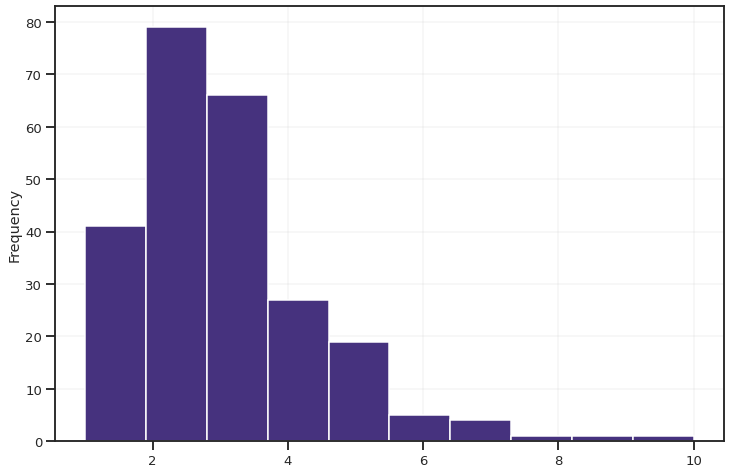

In [ ]:
# matplotlib
df_tips['tip'].plot.hist();

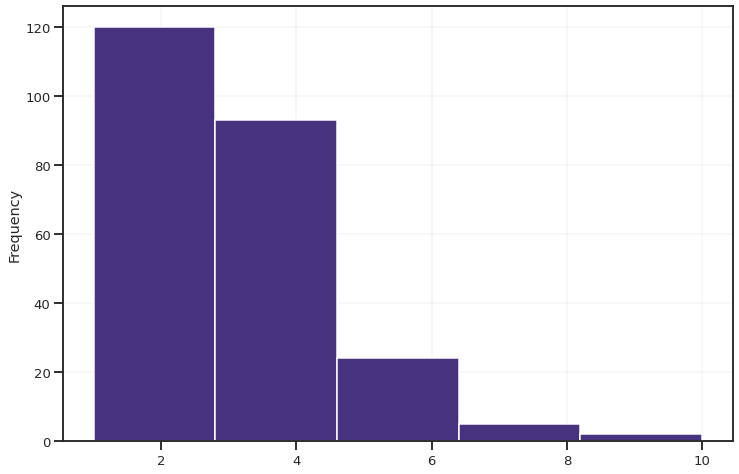

In [ ]:
# matplotlib
df_tips['tip'].plot.hist(bins=5);#bins define a quantidade de colunas

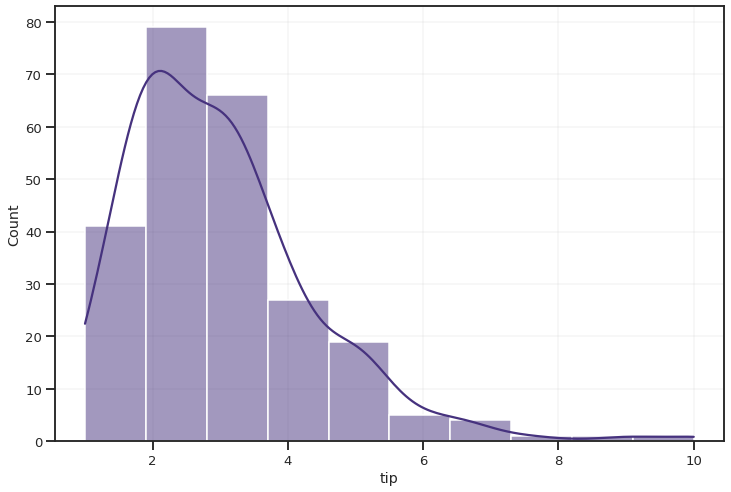

In [ ]:
# seaborn
sns.histplot(x=df_tips['tip'], kde=True, bins=10);#kde é sobre a curva

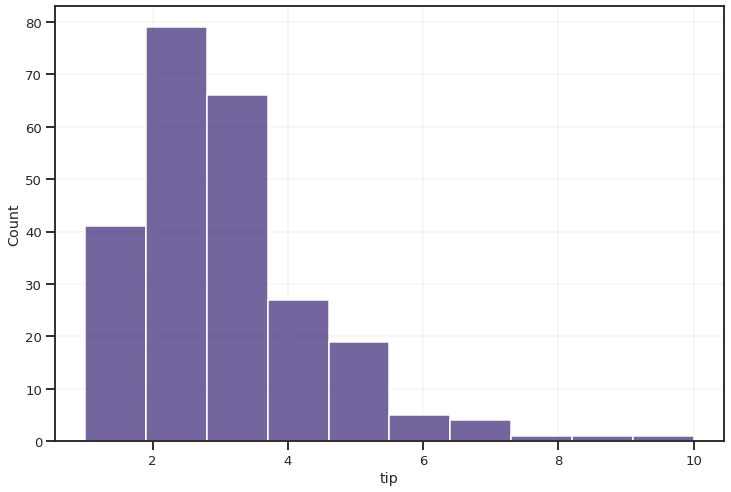

In [ ]:
# seaborn
sns.histplot(x=df_tips['tip'], bins=10);

In [ ]:
# plotly
px.histogram(df_tips, x='tip', title='Histograma')

### Boxplot

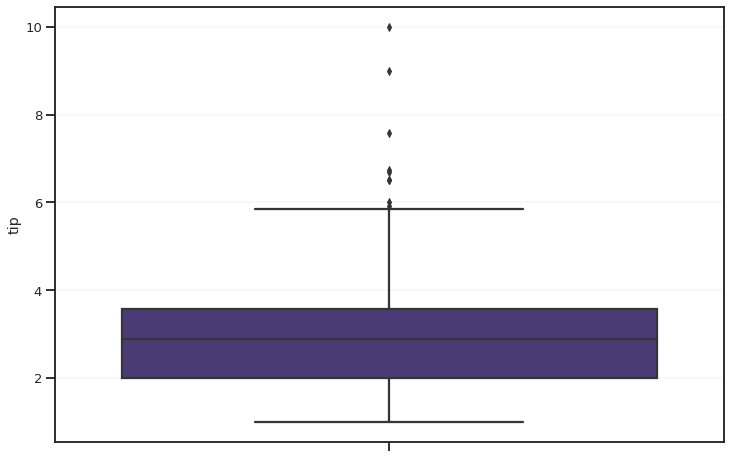

In [ ]:
# seaborn
sns.boxplot(data=df_tips, y='tip');

In [ ]:
# plotly backend
px.box(df_tips, y='tip')

In [ ]:
px.histogram(df_tips, x='tip', marginal='rug')

In [ ]:
px.histogram(df_tips, x='tip', marginal='box')

## Variáveis Categóricas

### Tabela de frequências

In [ ]:
# Tabela de frequência absoluta
df_tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
# Tabela de frequência relativa
df_tips['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [ ]:
# Tabela de frequência relativa (dataframe)
(
  df_tips['day']
 .value_counts(normalize=True)
 .to_frame('count_pct')
 .rename_axis('day')
 .reset_index()
)

,day,count_pct
0,Sat,0.356557
1,Sun,0.311475
2,Thur,0.254098
3,Fri,0.077869


In [ ]:
# sidetable
df_tips.stb.freq(['day'])

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


### Gráficos

### Gráfico de pizza

In [ ]:
df_counts = df_tips.stb.freq(['day'])
df_counts

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


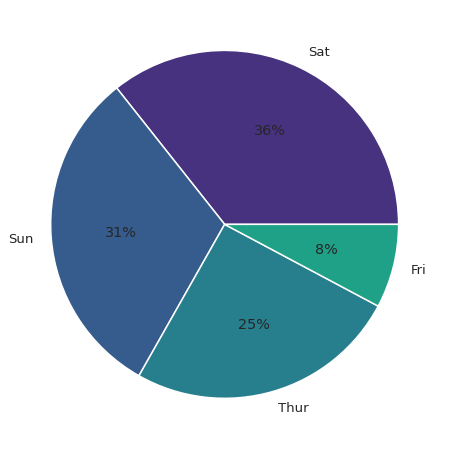

In [ ]:
plt.pie(x=df_counts['count'], labels=df_counts.day, autopct='%.0f%%');

In [ ]:
px.pie(df_counts, names='day', values='count')

### Gráfico de barras

In [ ]:
df_counts.head()

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


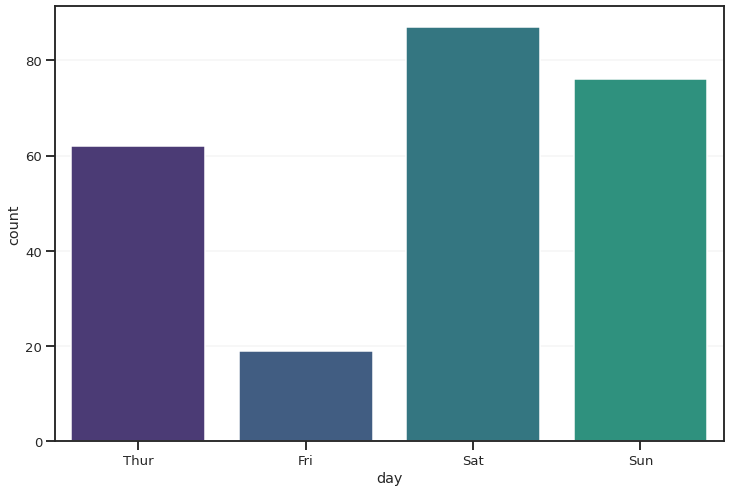

In [ ]:
# Plotando gráficos de barras vertical
sns.barplot(data=df_counts, x='day', y='count');

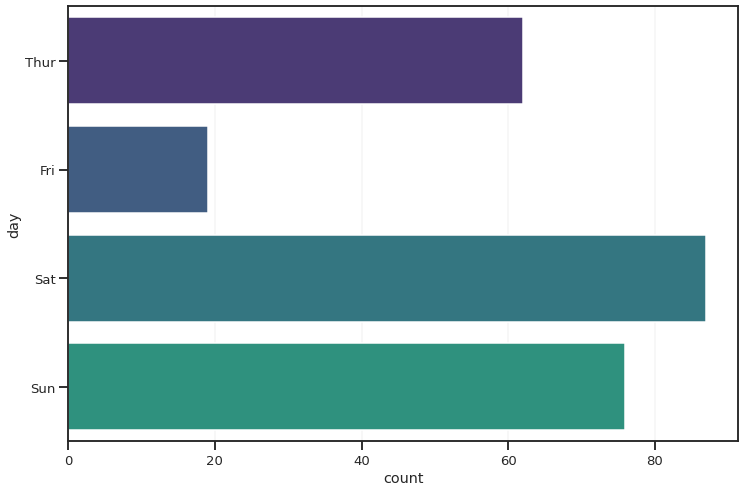

In [ ]:
# Plotando gráficos de barras horizontal
# Plotando gráficos de barras vertical
sns.barplot(data=df_counts, y='day', x='count');

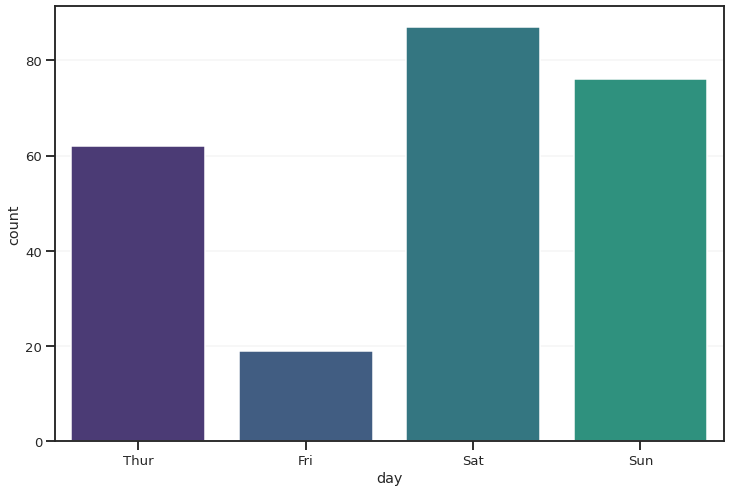

In [ ]:
# Plotando gráficos de barras diretamente
sns.countplot(data=df_tips, x='day');

# Análise Bivariada

![figure book favero](https://github.com/cmcouto-silva/figures/blob/main/statistics/estatisticas_descritivas_bivariadas.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).



In [ ]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Medidas de correlação

### Covariância

$$
cov_{x,y} = \frac{\sum{(x_i - \bar{x}) (y_i-\bar{y})}}{n - 1}
$$

In [ ]:
np.cov(df_tips['total_bill'], df_tips['tip'])

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [ ]:
pd.DataFrame(
    data=np.cov(df_tips['total_bill'], df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


### Correlação

$$
r = \frac{\sum{(x_i - \bar{x}) (y_i-\bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2} }}
$$

In [ ]:
np.corrcoef(df_tips['total_bill'], df_tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [ ]:
pd.DataFrame(
    data=np.corrcoef(df_tips['total_bill'], df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [ ]:
# Pandas correlation
df_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Medidas de associação

### Chi-quadrado

Mede associação entre duas variáveis categóricas:

$$
\chi^2 = \sum{\frac{(O_i - E_i)^2}{E_i}}
$$

In [ ]:
crosstab = pd.crosstab(df_tips['sex'], df_tips['smoker'])
crosstab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [ ]:
stats.chi2_contingency(crosstab)
#chi-quadrado, p=valor, graus de liberdade e matriz de valores esperados

(0.0, 1.0, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

In [ ]:
print(chi2, p) #xhi_2 =0 quer dizer que não tem relação

0.0 1.0


### Cramer's V

Coeficiente de associação baseado no $\chi^2$ que varia de 0 a 1, sendo 0 associação mínimas e 1 associação máxima:

$$
V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}}
$$

In [ ]:
stats.contingency.association(crosstab)

0.0028159517336962033

## Gráficos

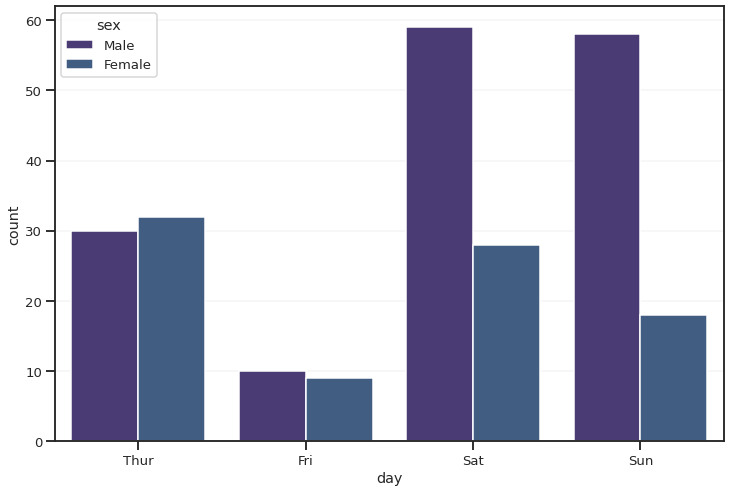

In [ ]:
# Countplot com outra variável (seaborn)
sns.countplot(data=df_tips, x='day', hue='sex');

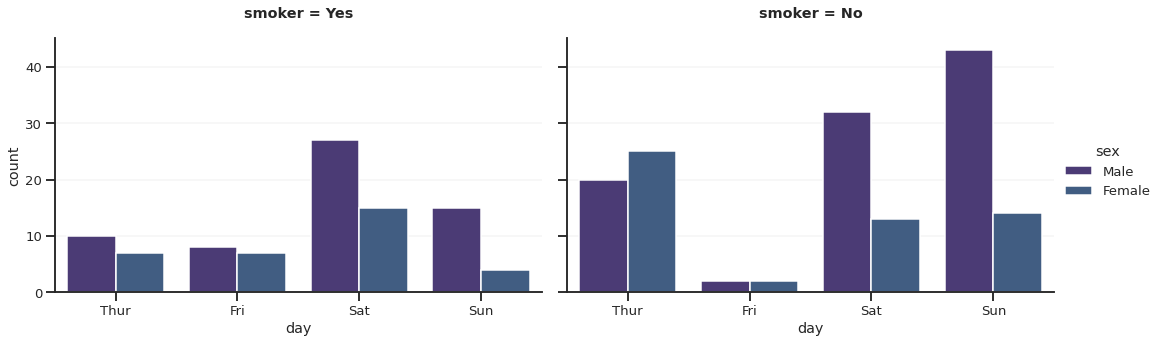

In [ ]:
sns.catplot(data=df_tips, x='day', hue='sex', kind='count', col='smoker', aspect=1.5);

In [ ]:
# Tabela de freq (stb)
df_counts = df_tips.stb.freq(['day','sex'])
df_counts

,day,sex,count,percent,cumulative_count,cumulative_percent
0,Sat,Male,59,24.180328,59,24.180328
1,Sun,Male,58,23.770492,117,47.950820
2,Thur,Female,32,13.114754,149,61.065574
3,Thur,Male,30,12.295082,179,73.360656
4,Sat,Female,28,11.475410,207,84.836066
5,Sun,Female,18,7.377049,225,92.213115
6,Fri,Male,10,4.098361,235,96.311475
7,Fri,Female,9,3.688525,244,100.000000


In [ ]:
# Countplot com outra variável (plotly)
px.bar(df_counts, x='day', y='count', color='sex', barmode='group')

In [ ]:
px.bar(df_counts, x='day', y='count', color='sex')

### Variáveis numéricas

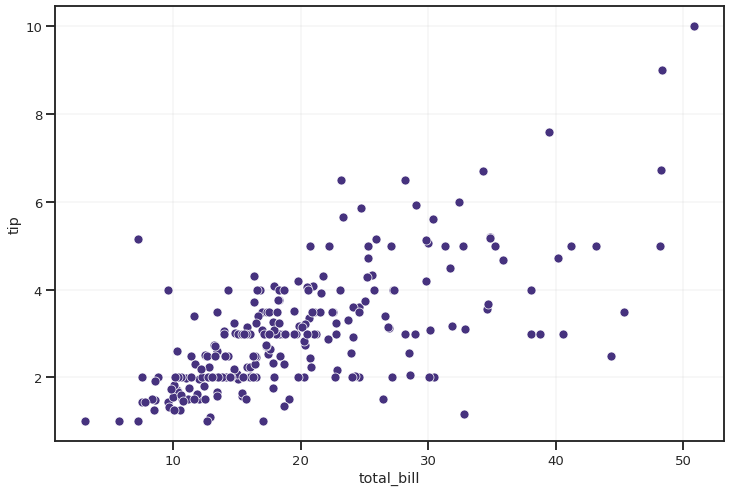

In [ ]:
# Scatterplot
sns.scatterplot(data=df_tips, x='total_bill', y='tip');

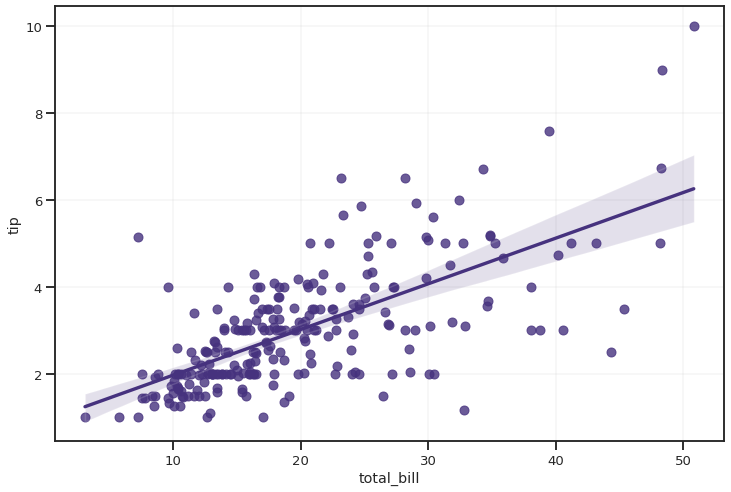

In [ ]:
# Lmplot
sns.regplot(data=df_tips, x='total_bill', y='tip');

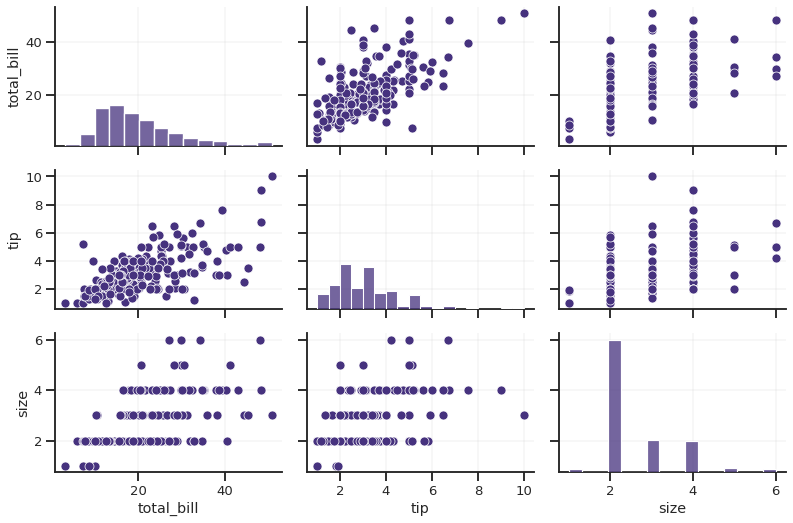

In [ ]:
# Pairplot
sns.pairplot(data=df_tips, aspect=1.5)
plt.tight_layout()
plt.show()

In [ ]:
# Heatmap (correlation)
dfc = df_tips.corr()
dfc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


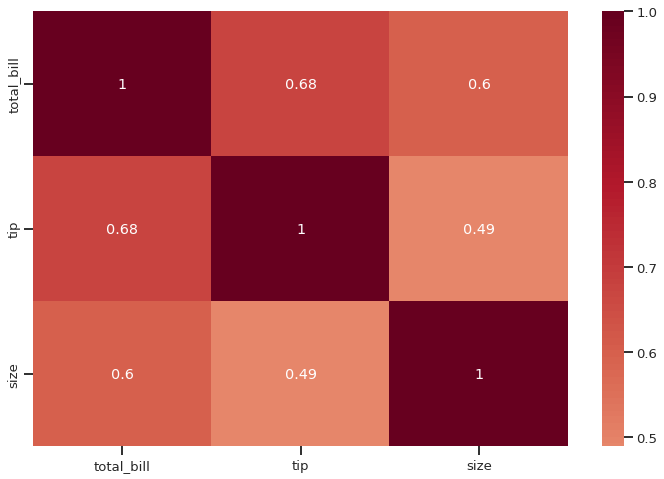

In [ ]:
sns.heatmap(dfc, annot=True, cmap='RdBu_r', center=0);

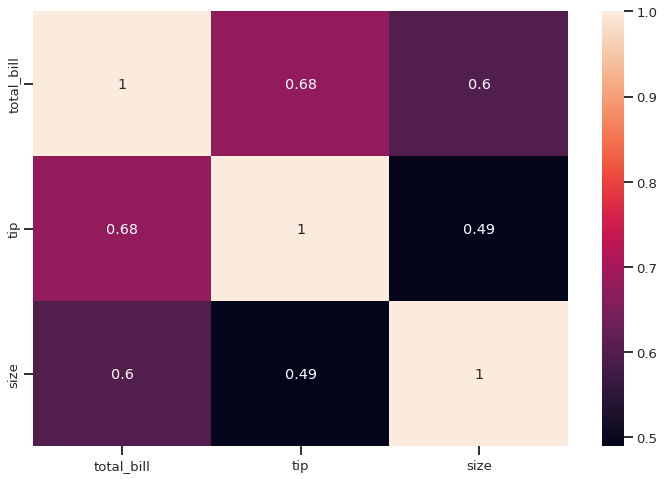

In [ ]:
sns.heatmap(dfc, annot=True);

### Variáveis numéricas + categóricas

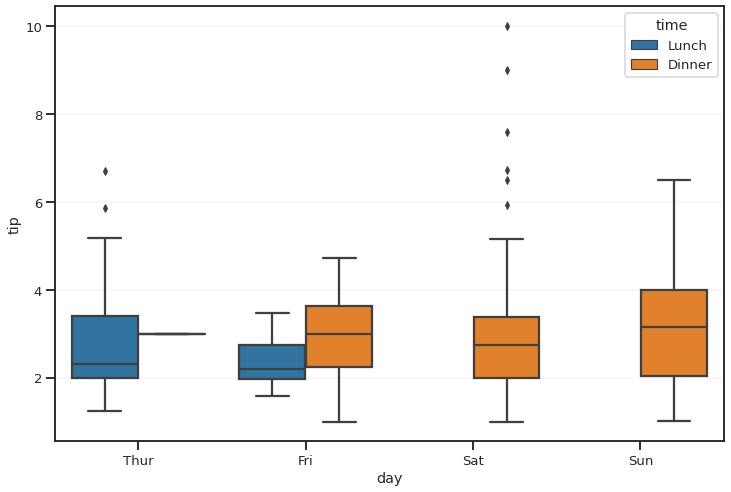

In [ ]:
# Boxplot day - total_bill
sns.boxplot(data=df_tips, x='day', y='tip', hue='time', palette='tab10');

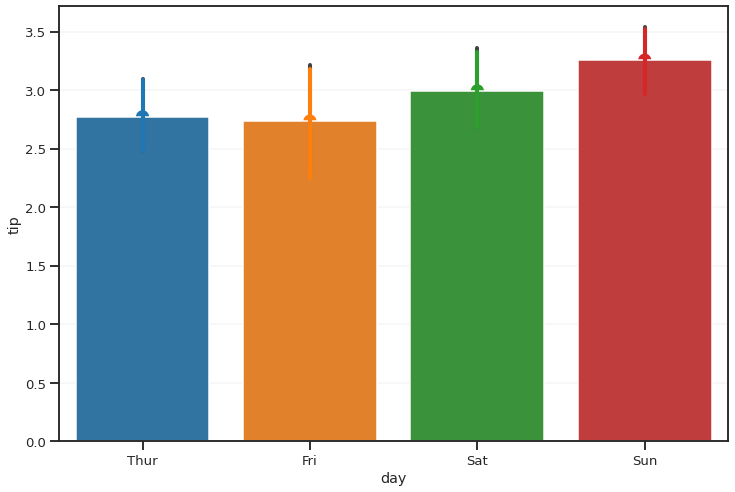

In [ ]:
# Barplot/pointplot day - total_bill
sns.barplot(data=df_tips, x='day', y='tip', palette='tab10')
sns.pointplot(data=df_tips, x='day', y='tip', palette='tab10')

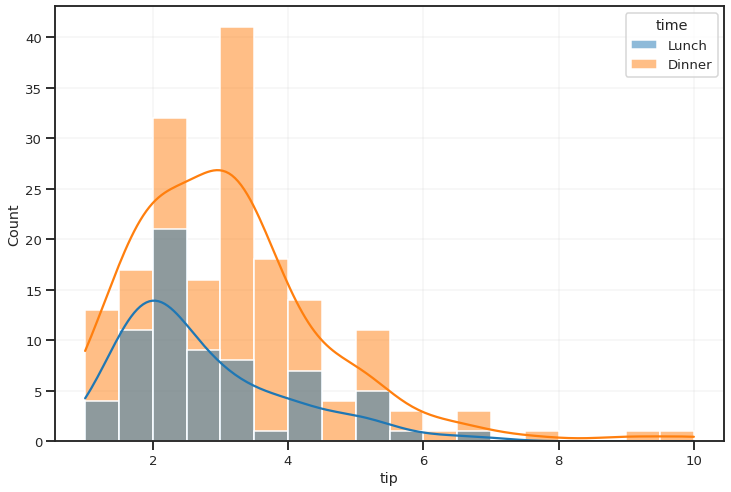

In [ ]:
# Histograma total_bill - sex
sns.histplot(data=df_tips, x='tip', hue='time', palette='tab10', kde=True);

**E as variáveis categóricas?**

É possível plotar matriz de coeficientes de Cramer como fizemos, além dos mapas perceptuais e diagramas de Sankey. 

Sugestão de leitura nestes tópicos (notebooks):
- [PyData Talk](https://github.com/cmcouto-silva/Talks/blob/main/PyData/pydata_20220625.ipynb)
- [Kaggle](https://www.kaggle.com/code/cmcoutosilva/an-lise-de-correspond-ncia-c-mara-dos-deputados)

# Referências bibliográficas

- [Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python](https://www.amazon.com.br/Practical-Statistics-Data-Scientists-2e/dp/149207294X) (Capítulo 1).
- [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/)  (Capítulos 1-3).
